In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
dfjob = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\jobselection.csv")

In [6]:
dfjob

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [7]:
dfjob.columns

Index(['score', 'exam_marks', 'seleted'], dtype='object')

In [8]:
dfjob.columns = ['score', 'marks', 'selected']

In [9]:
dfjob

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [10]:
dfjob["marks"]

0      26
1      38
2      40
3       8
4      17
       ..
995    44
996    65
997    34
998    46
999    10
Name: marks, Length: 1000, dtype: int64

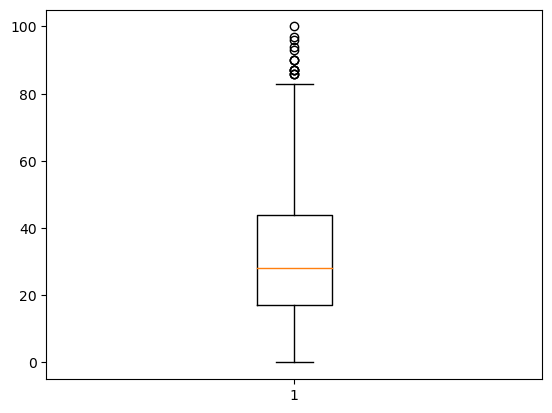

In [12]:
plt.boxplot(dfjob["marks"])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='marks', ylabel='Density'>

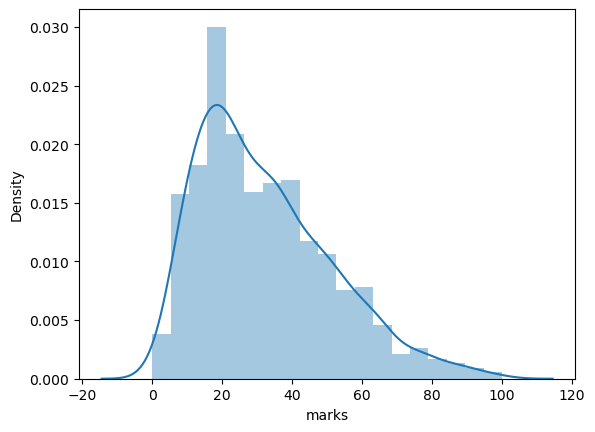

In [13]:
sns.distplot(dfjob["marks"])

In [14]:
dfjob["marks"].skew()

0.8356419499466834

In [15]:
np.round(dfjob["marks"].skew())

1.0

###  IQR

#####  IQR = Q3 - Q1 
#####  lower limit  =  Q1 - 1.5(IQR)
#####  lower limit  =  Q3 + 1.5(IQR)


In [16]:
dfjob["marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: marks, dtype: float64

In [18]:
q1 = dfjob["marks"].quantile(0.25)

In [19]:
q1

17.0

In [21]:
q3 = dfjob["marks"].quantile(0.75)

In [22]:
q3

44.0

In [23]:
iqr =  q3 - q1 

In [24]:
iqr

27.0

In [25]:
lower = q1 - (1.5*iqr)

In [26]:
lower

-23.5

In [27]:
upper = q3 + (1.5 * iqr)

In [28]:
upper

84.5

In [29]:
dfjob["marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: marks, dtype: float64

In [30]:
dfjob["marks"] < lower

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: marks, Length: 1000, dtype: bool

In [31]:
dfjob[ dfjob["marks"] < lower]

,score,marks,selected


In [32]:
dfjob["marks"] > upper

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: marks, Length: 1000, dtype: bool

In [33]:
dfjob[ dfjob["marks"] > upper]

,score,marks,selected
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [34]:
dfjob[ dfjob["marks"] > upper].shape

(15, 3)

In [35]:
dfjob[ dfjob["marks"] > upper].shape[0]

15

###  Trimming

###  First Method of Trimming

In [37]:
dfjob[ dfjob["marks"] > upper].index

Int64Index([9, 40, 61, 134, 162, 283, 290, 311, 324, 630, 685, 730, 771, 846,
            917],
           dtype='int64')

In [38]:
dfjob.drop([9, 40, 61, 134, 162, 283, 290, 311, 324, 630, 685, 730, 771, 846,
            917])

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


### second method - Trimming

In [39]:
(dfjob["marks"] < lower) | (dfjob["marks"] > upper)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: marks, Length: 1000, dtype: bool

In [40]:
dfjob[ (dfjob["marks"] < lower) | (dfjob["marks"] > upper)]

,score,marks,selected
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [41]:
(dfjob["marks"] >= lower) & (dfjob["marks"] <= upper) 

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: marks, Length: 1000, dtype: bool

In [43]:
dfjob = dfjob[ (dfjob["marks"] >= lower) & (dfjob["marks"] <= upper) ]

In [44]:
dfjob

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [45]:
dfjob[ (dfjob["marks"] < lower ) |  (dfjob["marks"] > upper) ]

,score,marks,selected


### capping 

In [46]:
dfsel = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\jobselection.csv")

In [47]:
dfsel

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [48]:
dfsel.columns

Index(['score', 'exam_marks', 'seleted'], dtype='object')

In [49]:
dfsel.columns = ['score', 'marks', 'seleted']

In [50]:
dfsel["marks"]

0      26
1      38
2      40
3       8
4      17
       ..
995    44
996    65
997    34
998    46
999    10
Name: marks, Length: 1000, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x22ca4ade190>,
 'caps': [<matplotlib.lines.Line2D at 0x22ca4caa910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ca4ade640>],
 'medians': [<matplotlib.lines.Line2D at 0x22ca4caafa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ca4caac40>],
 'means': []}

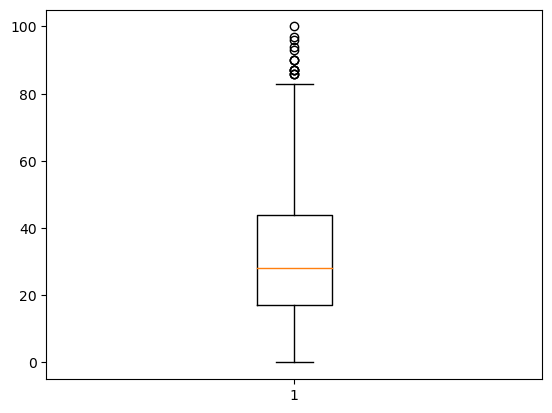

In [51]:
plt.boxplot(dfsel["marks"])

In [52]:
Q1 = dfsel["marks"].quantile(0.25)

In [53]:
Q1

17.0

In [54]:
Q3 = dfsel["marks"].quantile(0.75)

In [55]:
Q3

44.0

In [56]:
IQR = Q3 -Q1 

In [57]:
IQR

27.0

In [58]:
low = Q1 - (1.5 * IQR)

In [59]:
low

-23.5

In [60]:
up = Q3 + (1.5 * IQR)

In [61]:
up

84.5

In [62]:
dfsel[ dfsel["marks"] < low ]

,score,marks,seleted


In [63]:
dfsel[ dfsel["marks"] > up ]

,score,marks,seleted
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [64]:
dfsel[ (dfsel["marks"] < low) | (dfsel["marks"]>up) ]

,score,marks,seleted
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [65]:
dfsel["marks"]

0      26
1      38
2      40
3       8
4      17
       ..
995    44
996    65
997    34
998    46
999    10
Name: marks, Length: 1000, dtype: int64

In [67]:
dfsel["marks"] = dfsel["marks"].apply(lambda x : low if x < low  else  up  if x > up else x)

In [68]:
dfsel["marks"]

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: marks, Length: 1000, dtype: float64

In [69]:
dfsel[ (dfsel["marks"] < low) | (dfsel["marks"]>up) ]

,score,marks,seleted
